<a href="https://colab.research.google.com/github/JuanSeguraUNAL/Mediciones_en_Optica_y_Acustica/blob/master/practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1

In [19]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Diseño de los gráficos
sns.set()
sns.set_context("paper")
sns.set_palette("colorblind")

In [20]:
# Altura del agua
h = np.arange(10,101, 10)

# Desplazamientos del haz del infrarrojo
x_30 = np.array([1, 3, 6, 7, 9, 11, 13, 15, 17, 19])
x_45 = np.array([4, 8, 13, 16, 20, 24, 28, 33, 36, 40])
x_60 = np.array([9, 19, 27, 37, 49, 56, 67, 76, 86, 96])

# Funcion lineal
def lineal(h, b):
    return h * b

# Calculo del R2
def R2(x_datos, y_datos, b):
    y_ajuste = lineal(x_datos, b)
    RSS = np.sum((y_datos - y_ajuste)**2)
    TSS = np.sum((y_datos - np.mean(y_datos))**2)
    return 1 - RSS / TSS

# Grosor del vidrio
grosor = 4

In [21]:
def Refraccion(ang_in, x):
    b, db = curve_fit(lineal, h, x)
    b = b[0]; db = np.sqrt(db[0][0])

    # Calculo del R2
    r2 = R2(h, x, b)

    fig, ax = plt.subplots(figsize=(10, 8))
    H = np.linspace(0, 101, 100)
    ax.scatter(h, x)
    ax.plot(H, lineal(H, b), label= rf"Ajuste $R^2 = {r2:.3f}$")
    ax.set_xlabel(r"Altura del agua [mm]", fontsize= 14)
    ax.set_ylabel(r"Desplazamiento del haz [mm]", fontsize= 14)
    ax.grid(True)
    ax.legend(fontsize= 13)
    plt.tight_layout()
    #fig.savefig("Prac1_Ajuste_exp1.pdf")
    plt.show()

    # Calcular la tangente del angulo de refraccion a partir de la pendiente
    tan = np.tan(np.deg2rad(ang_in)) - b

    # Angulo de refraccion para angulo incidente
    ang = np.arctan(tan)
    print(f"El angulo de refraccion para el angulo incidente {ang_in:.1f} es: {np.rad2deg(ang)}")

    # Calcular el indice de refraccion del agua (Se asume el indice del aire como 1)
    n_agua = np.sin(np.deg2rad(ang_in)) / np.sin(ang)
    print(f"El indice de refraccion del agua para angulo incidente {ang_in:.1f} es: {n_agua}")

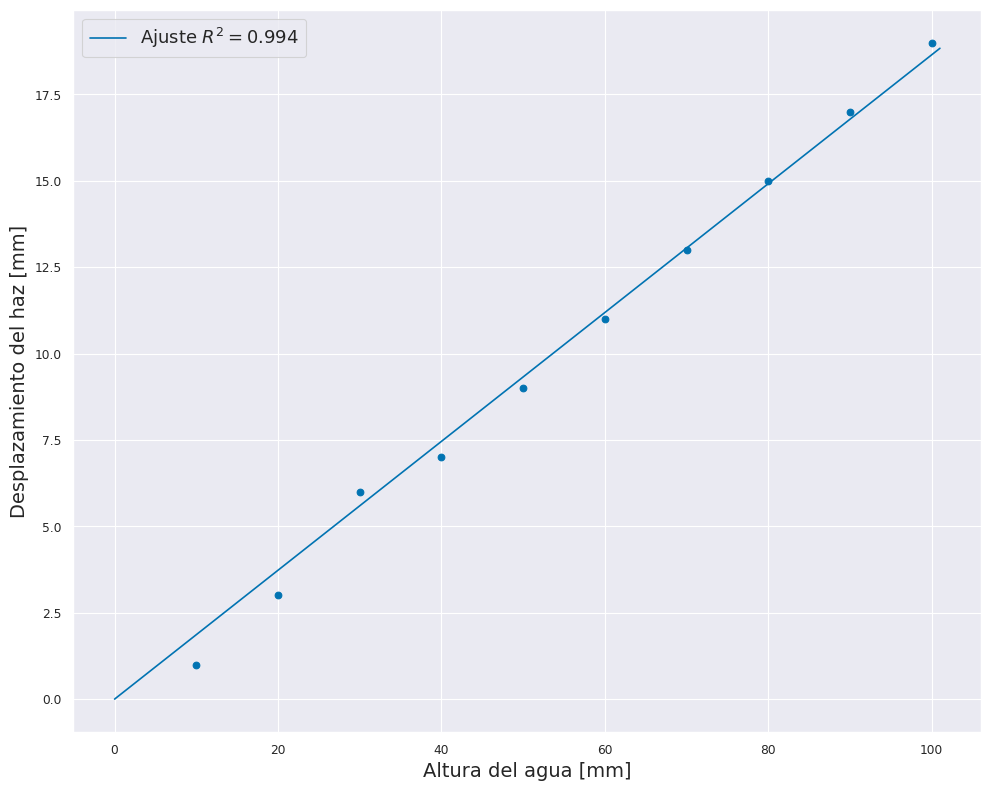

El angulo de refraccion para el angulo incidente 30.0 es: 21.348379438182242
El indice de refraccion del agua para angulo incidente 30.0 es: 1.3734837321471371


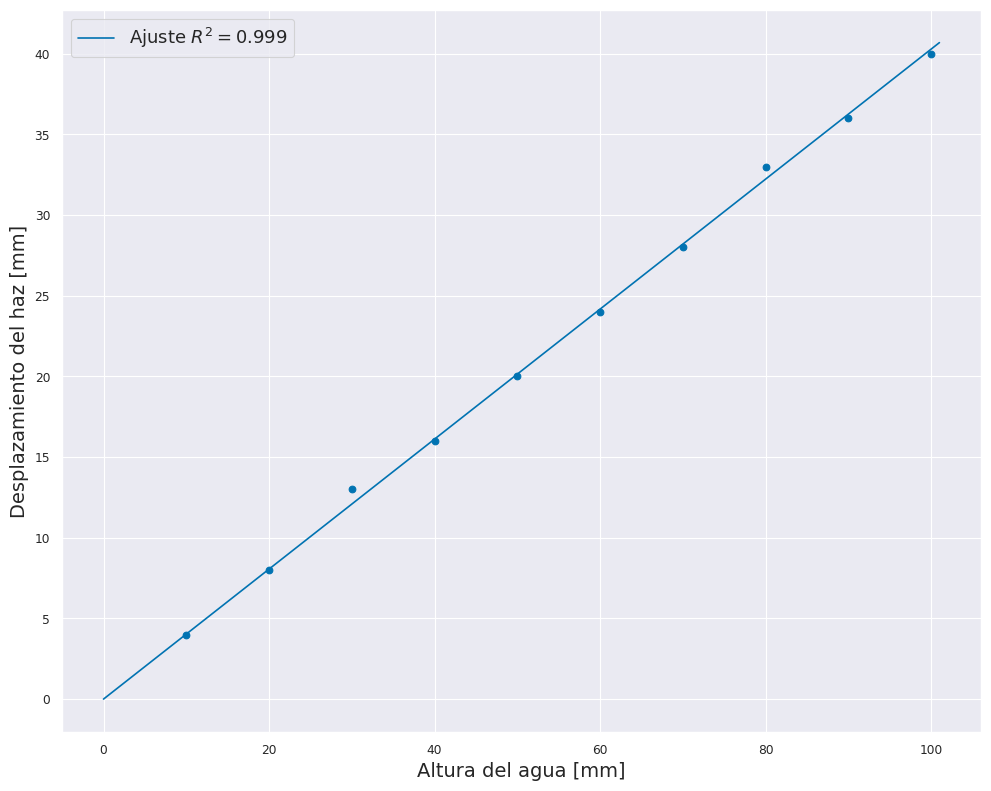

El angulo de refraccion para el angulo incidente 45.0 es: 30.843235507655795
El indice de refraccion del agua para angulo incidente 45.0 es: 1.3792068328688913


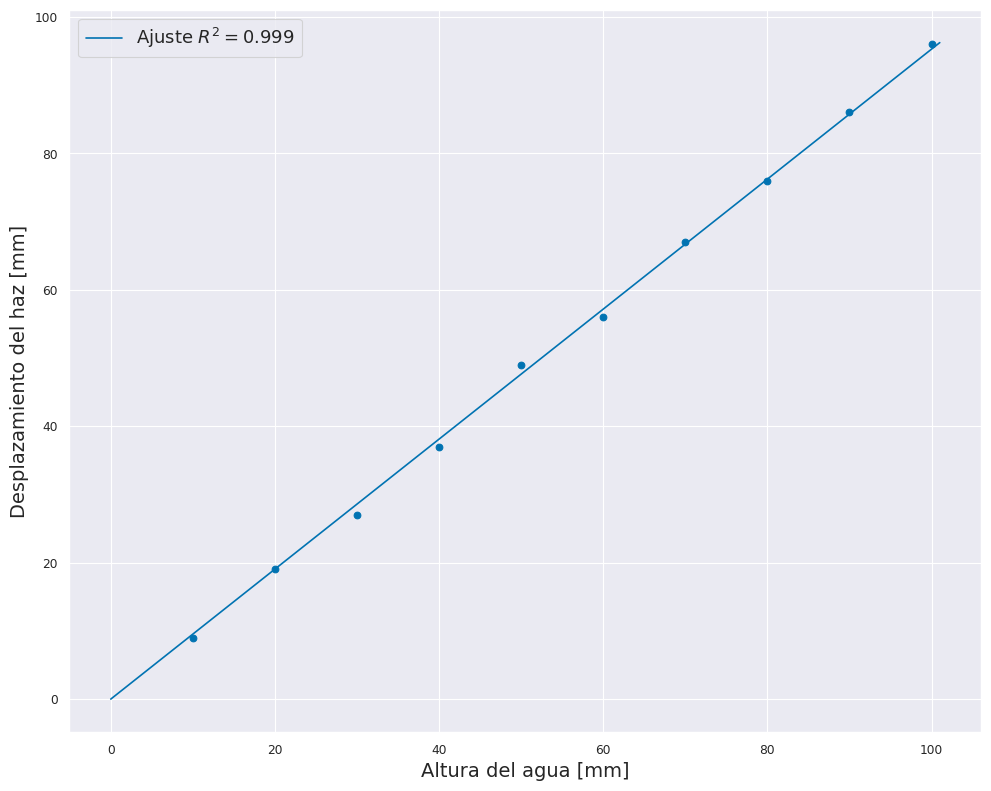

El angulo de refraccion para el angulo incidente 60.0 es: 37.93012535763445
El indice de refraccion del agua para angulo incidente 60.0 es: 1.4088586247620183


In [22]:
Refraccion(30, x_30)
Refraccion(45, x_45)
Refraccion(60, x_60)

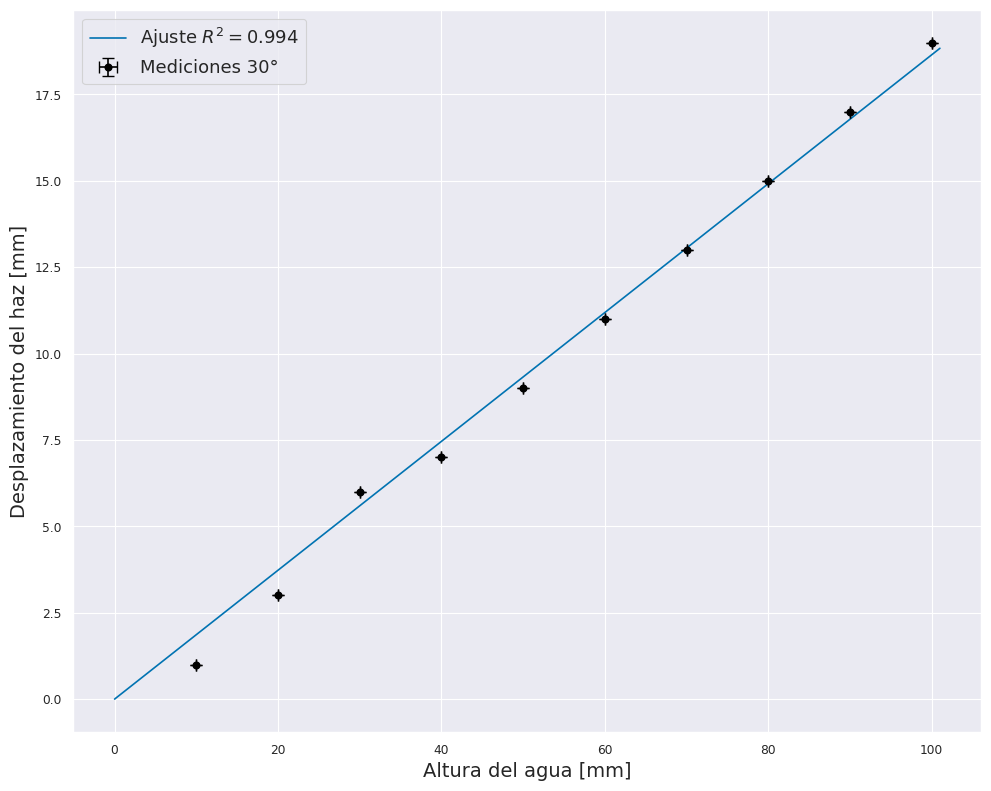

Ángulo de refracción para incidente 30.0°: 21.35°
Índice de refracción del agua para incidente 30.0°: 1.373
------------------------------------------------------------


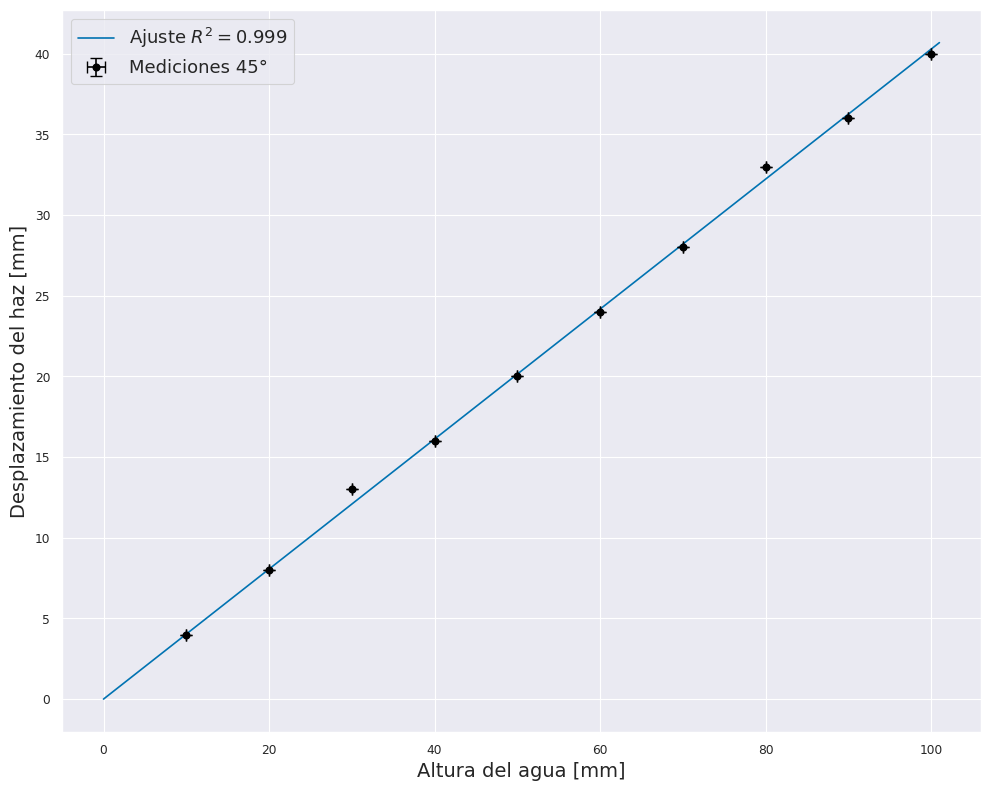

Ángulo de refracción para incidente 45.0°: 30.84°
Índice de refracción del agua para incidente 45.0°: 1.379
------------------------------------------------------------


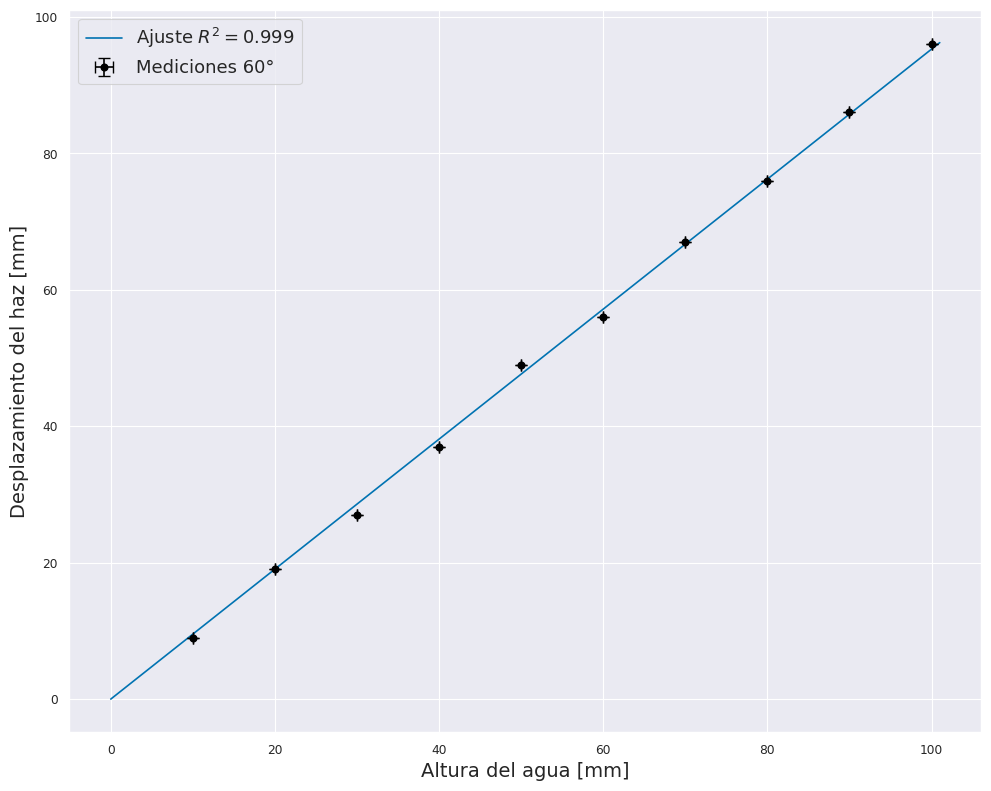

Ángulo de refracción para incidente 60.0°: 37.93°
Índice de refracción del agua para incidente 60.0°: 1.409
------------------------------------------------------------


In [27]:
# Gráficas con barrita de error (aquí para no dañarle nada a Manuel)

# Altura del agua
h = np.arange(10, 101, 10)

# Desplazamientos del haz del infrarrojo
x_30 = np.array([1, 3, 6, 7, 9, 11, 13, 15, 17, 19])
x_45 = np.array([4, 8, 13, 16, 20, 24, 28, 33, 36, 40])
x_60 = np.array([9, 19, 27, 37, 49, 56, 67, 76, 86, 96])

# Función lineal
def lineal(h, b):
    return h * b

# Calculo del R2
def R2(x_datos, y_datos, b):
    y_ajuste = lineal(x_datos, b)
    RSS = np.sum((y_datos - y_ajuste)**2)
    TSS = np.sum((y_datos - np.mean(y_datos))**2)
    return 1 - RSS / TSS

# Grosor del vidrio
grosor = 4

def Refraccion(ang_in, x, nombre=""):
    b, db = curve_fit(lineal, h, x)
    b = b[0]; db = np.sqrt(db[0][0])

    # Calculo del R2
    r2 = R2(h, x, b)

    fig, ax = plt.subplots(figsize=(10, 8))
    H = np.linspace(0, 101, 100)

    # Ajuste
    ax.plot(H, lineal(H, b), label=rf"Ajuste $R^2 = {r2:.3f}$")
    ax.set_xlabel(r"Altura del agua [mm]", fontsize=14)
    ax.set_ylabel(r"Desplazamiento del haz [mm]", fontsize=14)
    ax.grid(True)

    # Incertidumbres papel milimetrado
    delta_h = np.full_like(h, 0.5)
    delta_x = np.full_like(x, 0.5)

    # Barritas de error
    ax.errorbar(h, x, xerr=delta_h, yerr=delta_x,
                fmt='o', capsize=4, color='black', label=f"Mediciones {nombre}")

    ax.legend(fontsize=13)
    plt.tight_layout()
    plt.show()

    # Calcular la tangente del ángulo de refracción a partir de la pendiente
    tan = np.tan(np.deg2rad(ang_in)) - b

    # Ángulo de refracción para ángulo incidente
    ang = np.arctan(tan)
    print(f"Ángulo de refracción para incidente {ang_in:.1f}°: {np.rad2deg(ang):.2f}°")

    # Calcular el índice de refracción del agua (n_aire ≈ 1)
    n_agua = np.sin(np.deg2rad(ang_in)) / np.sin(ang)
    print(f"Índice de refracción del agua para incidente {ang_in:.1f}°: {n_agua:.3f}")
    print("-"*60)


# --- Llamadas a la función para cada ángulo ---
Refraccion(30, x_30, nombre="30°")
Refraccion(45, x_45, nombre="45°")
Refraccion(60, x_60, nombre="60°")


NameError: name 'x_30' is not defined